#Online Payments Fraud Detection









Connecting Google Colab to Kaggle to get Dataset directly to colab

In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle_datasets/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d jainilcoder/online-payment-fraud-detection

Downloading the helper functions designed by mrdbourke which contains custom functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

Installing pycaret library

In [ ]:
!pip install --pre pycaret

Installing model deployment library

In [ ]:
!pip install gradio

In [ ]:
!pip install autoviz

Installing Specific version of matplotlib

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.0

Importing required functions from helper functions

In [ ]:
from helper_functions import unzip_data

unziping the dataset

In [ ]:
unzip_data('online-payment-fraud-detection.zip')

Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
from pycaret.classification import *
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("onlinefraud.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


checking datatypes and size of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Sampling the data

* As the dataset too large which consists around 6362620 entries, if we procced entire dataset at one go ,it will take lot of processing time.

* To solve this issue we going to take sample out of this dataset , i have taken 20% of data as sample, you can tune this sample size



In [ ]:
df1 = df.sample(frac=0.2)

Dropping unnecessary columns 

In [ ]:
df1 = df1.drop(columns = ['nameOrig','nameDest','isFlaggedFraud'], axis = 1)

Over Sampling Method

* As the Target Variable i.e isFraud contains less no of companies goes isFraud i.e no of 1 is less as compared to 0. This is where we use oversampling method to make this two classes balanced.

In [ ]:
df1['isFraud'].value_counts()

0    1270828
1       1696
Name: isFraud, dtype: int64

#Model Building using Auto ML



> Pycaret AutoML Library

* PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.

* It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

* Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient.



Step 1 : Setting up preprocessing the data: 

* fix_balance : over sampling
* remove_outliers: outliers
* target : dependent variable

In [ ]:
clf1 = setup(data=df1, target='isFraud',fix_imbalance=True,remove_outliers=True,use_gpu=True)

,Description,Value
0,Session id,8383
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(1272524, 8)"
4,Transformed data shape,"(2077770, 12)"
5,Transformed train set shape,"(1695462, 12)"
6,Transformed test set shape,"(381758, 12)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


 step 2 : check which model perform best

In [ ]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:18:28
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9990,0.9103,0.8213,0.5663,0.6689,0.6684,0.6807,16.8330
rf,Random Forest Classifier,0.9990,0.9962,0.7998,0.5663,0.6610,0.6605,0.6714,205.5670
knn,K Neighbors Classifier,0.9934,0.9119,0.8070,0.1384,0.2362,0.2346,0.3325,20.8330
qda,Quadratic Discriminant Analysis,0.9921,0.6136,0.2341,0.2661,0.0837,0.0826,0.1339,7.3970
gbc,Gradient Boosting Classifier,0.9837,0.9988,0.9848,0.0709,0.1323,0.1302,0.2619,364.1050
ada,Ada Boost Classifier,0.9783,0.9893,0.9633,0.0531,0.1006,0.0985,0.2234,102.2800
svm,SVM - Linear Kernel,0.9621,0.0000,0.9580,0.0422,0.0786,0.0764,0.1861,88.9010
lr,Logistic Regression,0.9529,0.9807,0.9776,0.0289,0.0558,0.0535,0.1604,80.1400
ridge,Ridge Classifier,0.8804,0.0000,0.9598,0.0100,0.0198,0.0174,0.0914,6.8000
lda,Linear Discriminant Analysis,0.8804,0.9809,0.9598,0.0100,0.0198,0.0174,0.0914,9.1850


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Logistic Regression has performed really well, so im going to use this model for deployment

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9999,0.9869,0.9739,0.9739,0.9739,0.9739,0.9739
1,0.9999,0.9826,0.9652,0.9652,0.9652,0.9652,0.9652
2,1.0000,0.9956,0.9913,0.9828,0.9870,0.9870,0.9870
3,0.9999,0.9913,0.9826,0.9658,0.9741,0.9741,0.9741
4,0.9999,0.9782,0.9565,0.9821,0.9692,0.9691,0.9692
5,1.0000,0.9956,0.9913,0.9913,0.9913,0.9913,0.9913
6,0.9999,0.9824,0.9649,0.9735,0.9692,0.9691,0.9691
7,1.0000,1.0000,1.0000,0.9913,0.9956,0.9956,0.9956
8,0.9999,0.9913,0.9826,0.9741,0.9784,0.9783,0.9783


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predict_model(lr)

In [ ]:
save_model(lr,'best model fraud detection')

In [ ]:
loaded_model = load_model("best model fraud detection")

Transformation Pipeline and Model Successfully Loaded


In [ ]:
predict_model(loaded_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0.9921,0.9843,0.9785,0.9814,0.9814,0.9814


,step,type_CASH_IN,type_PAYMENT,type_CASH_OUT,type_TRANSFER,type_DEBIT,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,prediction_label,prediction_score
890766,185.0,0.0,1.0,0.0,0.0,0.0,11684.940430,3.784100e+04,2.615606e+04,0.000000e+00,0.000000e+00,0,0,1.0
890767,401.0,0.0,0.0,1.0,0.0,0.0,301589.781250,1.157000e+04,0.000000e+00,1.242851e+06,1.544441e+06,0,0,1.0
890768,306.0,1.0,0.0,0.0,0.0,0.0,157145.984375,3.729595e+06,3.886741e+06,3.071998e+06,2.914852e+06,0,0,1.0
890769,11.0,0.0,0.0,1.0,0.0,0.0,88265.773438,0.000000e+00,0.000000e+00,3.160262e+05,4.042920e+05,0,0,1.0
890770,400.0,1.0,0.0,0.0,0.0,0.0,156638.812500,3.550690e+06,3.707329e+06,1.156086e+06,9.994476e+05,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272519,345.0,0.0,0.0,0.0,1.0,0.0,128936.953125,1.289370e+05,0.000000e+00,0.000000e+00,0.000000e+00,1,1,1.0
1272520,401.0,1.0,0.0,0.0,0.0,0.0,386095.156250,1.341931e+06,1.728026e+06,6.156452e+05,2.295501e+05,0,0,1.0
1272521,209.0,0.0,1.0,0.0,0.0,0.0,6293.189941,4.032200e+04,3.402881e+04,0.000000e+00,0.000000e+00,0,0,1.0
1272522,328.0,0.0,1.0,0.0,0.0,0.0,37352.839844,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,1.0


Feature Importance plot

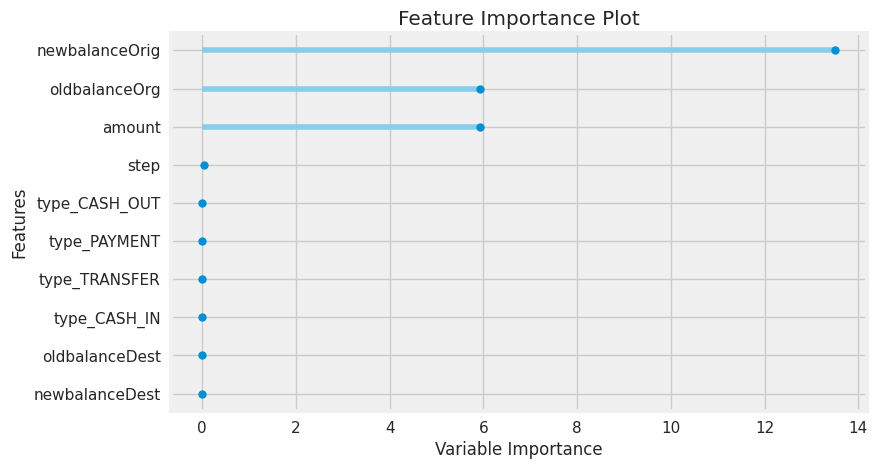

In [ ]:
plot_model(loaded_model, plot = "feature")

Running app for actual prediction

In [ ]:
create_app(loaded_model)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>